-9.813646786905975


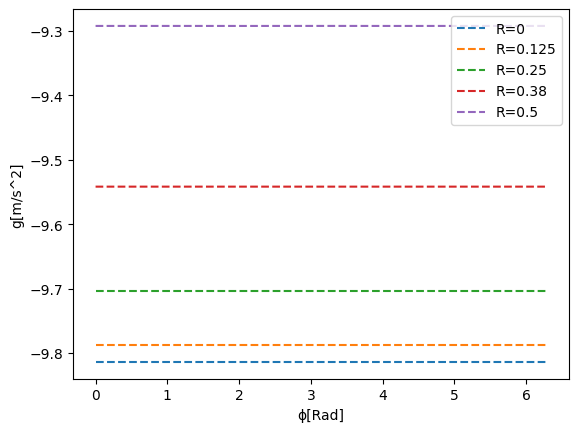

Apartado G:
g(R=0.5) = -9.292620391665508
g(R=1) = -4.673047117443005


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#a) Cargue N = 50 puntos y pesos de Gauss para calcular el campo gravitacional sobre el disco.
roots, weights = np.polynomial.legendre.leggauss(50)

#b) Defina la función de la Ecuación (4.208).
def funcion(x,y,z,r,phi):
    return z*r / ( (x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi) + r ** 2) ** 1.5)

#c) Defina una función para calcular la integral usando la forma de doble cuadratura (Ecuación (4.170)).
def integral(f,x,y,z):
    k = -1.9429303960

    t1 = 0.5 * (2*np.pi*roots + 2*np.pi)
    t2 = 0.5 * (roots + 1)

    weights1 = weights * np.pi
    weights2 = weights * 0.5

    inte = 0

    for i in range(0,50):
        for j in range(0,50):
            inte += weights1[i] * weights2[j]* f(x,y,z,t2[i],t1[j])

    return k * inte

#d) Verifique que el campo gravitaci´on en el punto (0., 0., 0.2) es efectivamente g = −9.813646 m/s^2.
print(integral(funcion,0,0,0.2))

#e) Usando coordenadas polares:
phi_values = np.linspace(0,2*np.pi,10)
R = [0, 0.125, 0.25, 0.38, 0.5,]

fig, ax = plt.subplots()
for r in R:
    x_data = np.array([r*np.cos(phi) for phi in phi_values])
    y_data = np.array([r*np.sin(phi) for phi in phi_values])
    int_values = integral(funcion,x_data,y_data,0.2)
    ax.plot(phi_values,int_values,linestyle="--",label=f"R={r}")

ax.set_xlabel("ϕ[Rad]")
ax.set_ylabel("g[m/s^2]")
plt.legend()
plt.show()

# Punto G (Valor de g para R = 0.5 y R = 1)
Rg = [0.5, 1]

print('Apartado G:')
for i in Rg:
    x_data = np.array([i*np.cos(phi) for phi in phi_values])
    y_data = np.array([i*np.sin(phi) for phi in phi_values])
    int_v = integral(funcion,x_data,y_data,0.2)
    print(f'g(R={i}) = {int_v[-1]}')